In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['SMGBY']

# Set up End and Start times for data grab
tech_list = ['SMGBY']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [4]:
company_list = [SMGBY]
company_name = ["SAN MIGUEL CORPORATION"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-28 00:00:00-04:00,16.600000,16.600000,16.600000,16.600000,16.541128,0,SAN MIGUEL CORPORATION
2022-09-29 00:00:00-04:00,16.600000,16.600000,16.600000,16.600000,16.541128,0,SAN MIGUEL CORPORATION
2022-09-30 00:00:00-04:00,17.200001,17.200001,17.200001,17.200001,17.139000,100,SAN MIGUEL CORPORATION
2022-10-03 00:00:00-04:00,17.200001,17.200001,17.200001,17.200001,17.139000,0,SAN MIGUEL CORPORATION
2022-10-04 00:00:00-04:00,17.200001,17.200001,17.200001,17.200001,17.139000,0,SAN MIGUEL CORPORATION
2022-10-05 00:00:00-04:00,16.219999,16.219999,16.219999,16.219999,16.219999,400,SAN MIGUEL CORPORATION
2022-10-06 00:00:00-04:00,16.219999,16.219999,16.219999,16.219999,16.219999,0,SAN MIGUEL CORPORATION
2022-10-07 00:00:00-04:00,16.219999,16.219999,16.219999,16.219999,16.219999,0,SAN MIGUEL CORPORATION
2022-10-10 00:00:00-04:00,16.219999,16.219999,16.219999,16.219999,16.219999,0,SAN MIGUEL CORPORATION


In [5]:
# Summary Stats
SMGBY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,22.282639,22.283611,22.267917,22.268889,21.938539,92.063492
std,2.768605,2.769162,2.745961,2.746528,2.589348,459.163935
min,16.219999,16.219999,16.219999,16.219999,16.219999,0.000000
25%,20.500000,20.500000,20.500000,20.500000,20.107981,0.000000
50%,22.490000,22.490000,22.490000,22.490000,22.192007,0.000000
75%,24.409999,24.409999,24.409999,24.409999,23.971243,0.000000
max,30.420000,30.420000,30.420000,30.420000,29.664633,7300.000000


In [6]:
# General info
SMGBY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-10-12 00:00:00-04:00 to 2022-10-11 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


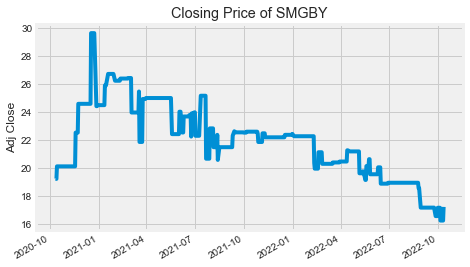

In [7]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.show()

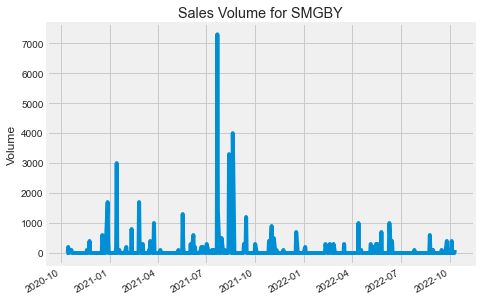

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.show()

# 2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


In [10]:
#print(SMGBY.columns)

In [11]:
#df.groupby("company_name").hist(figsize=(12, 12));

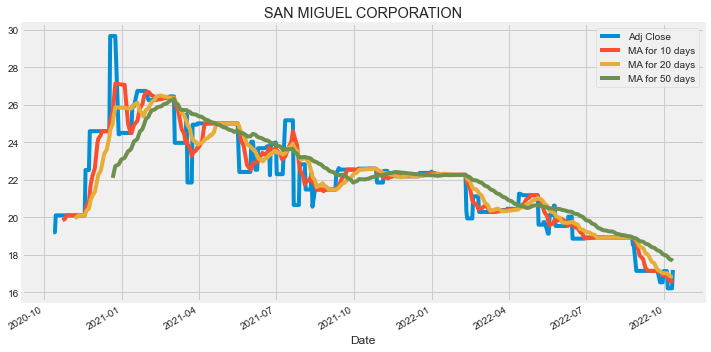

In [12]:
fig, axes = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

SMGBY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('SAN MIGUEL CORPORATION')

fig.tight_layout()

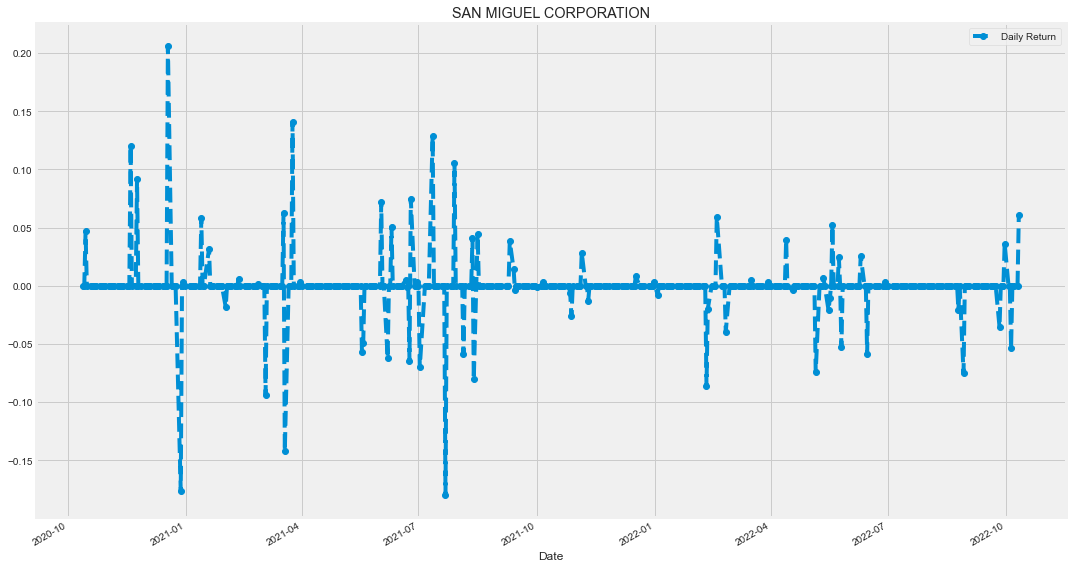

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

SMGBY['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('SAN MIGUEL CORPORATION')

fig.tight_layout()

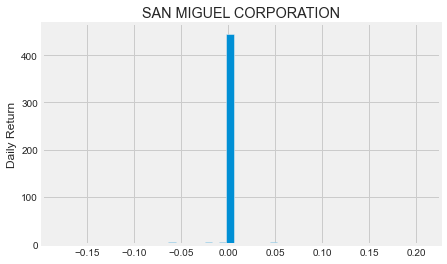

In [14]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,SMGBY
Date,
2020-10-12,19.210823
2020-10-13,19.210823
2020-10-14,19.210823
2020-10-15,20.107977
2020-10-16,20.107977


In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,SMGBY
Date,
2020-10-12,NaN
2020-10-13,0.0000
2020-10-14,0.0000
2020-10-15,0.0467
2020-10-16,0.0000


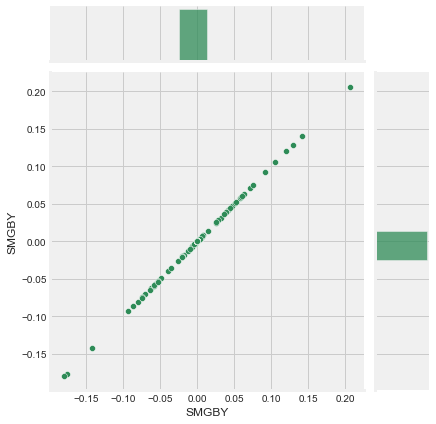

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='SMGBY', y='SMGBY', data=tech_rets, kind='scatter', color='seagreen')

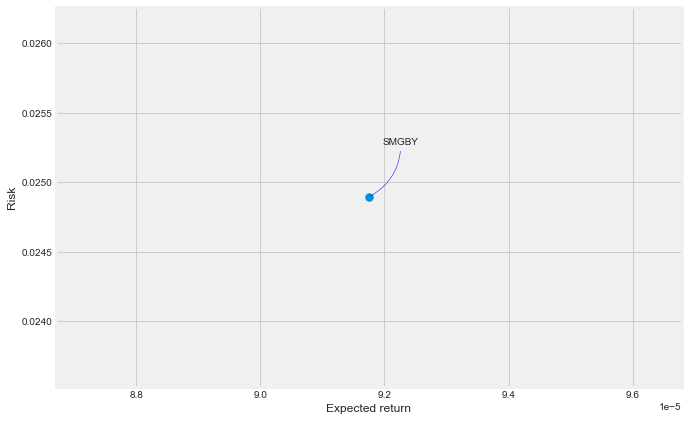

In [18]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [19]:
# Get the stock quote
df = pd.read_csv("SMGBY - OCT 2020 - OCT 2022.csv")
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-11,22.900000,22.900000,22.900000,22.900000,22.596573,0
1,2021-10-12,22.900000,22.900000,22.900000,22.900000,22.596573,0
2,2021-10-13,22.900000,22.900000,22.900000,22.900000,22.596573,0
3,2021-10-14,22.900000,22.900000,22.900000,22.900000,22.596573,0
4,2021-10-15,22.900000,22.900000,22.900000,22.900000,22.596573,0
...,...,...,...,...,...,...,...
247,2022-10-04,17.200001,17.200001,17.200001,17.200001,17.139000,0
248,2022-10-05,16.219999,16.219999,16.219999,16.219999,16.219999,400
249,2022-10-06,16.219999,16.219999,16.219999,16.219999,16.219999,0
250,2022-10-07,16.219999,16.219999,16.219999,16.219999,16.219999,0


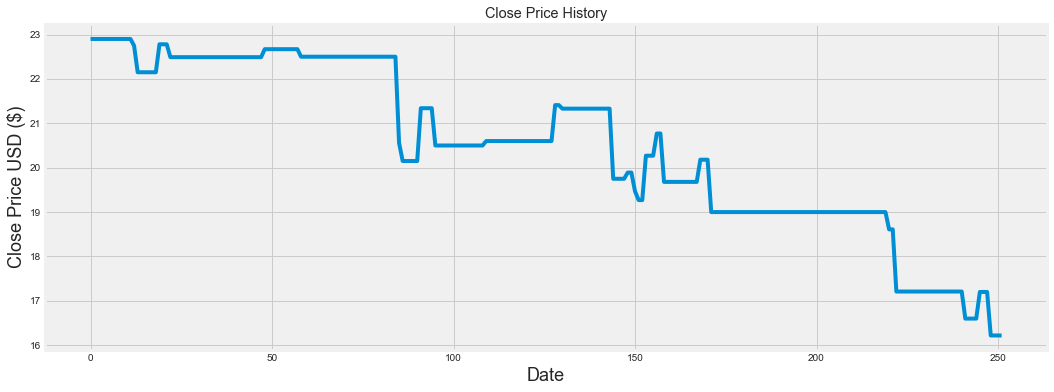

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

240

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.97754491],
       [0.88772457],
       [0.88772457],
       [0.88772457],
       [0.88772457],
       [0.88772457],
       [0.88772457],
       [0.98203608],
       [0.98203608],
       [0.98203608],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.93862276],
       [0.938

In [23]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train= []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.97754491, 0.88772457, 0.88772457,
       0.88772457, 0.88772457, 0.88772457, 0.88772457, 0.98203608,
       0.98203608, 0.98203608, 0.93862276, 0.93862276, 0.93862276,
       0.93862276, 0.93862276, 0.93862276, 0.93862276, 0.93862276,
       0.93862276, 0.93862276, 0.93862276, 0.93862276, 0.93862276,
       0.93862276, 0.93862276, 0.93862276, 0.93862276, 0.93862276,
       0.93862276, 0.93862276, 0.93862276, 0.93862276, 0.93862276,
       0.93862276, 0.93862276, 0.93862276, 0.96556887, 0.96556887,
       0.96556887, 0.96556887, 0.96556887, 0.96556887, 0.96556887,
       0.96556887, 0.96556887, 0.96556887, 0.94011977, 0.94011977])]
[0.9401197694431485]

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.977

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
6/6 [==============================] - 7s 74ms/step - loss: 0.1538
Epoch 2/50
6/6 [==============================] - 0s 73ms/step - loss: 0.0236
Epoch 3/50
6/6 [==============================] - 0s 77ms/step - loss: 0.0176
Epoch 4/50
6/6 [==============================] - 0s 80ms/step - loss: 0.0155
Epoch 5/50
6/6 [==============================] - 0s 80ms/step - loss: 0.0114
Epoch 6/50
6/6 [==============================] - 1s 84ms/step - loss: 0.0101
Epoch 7/50
6/6 [==============================] - 1s 83ms/step - loss: 0.0090
Epoch 8/50
6/6 [==============================] - 0s 80ms/step - loss: 0.0077
Epoch 9/50
6/6 [==============================] - 0s 82ms/step - loss: 0.0073
Epoch 10/50
6/6 [==============================] - 1s 89ms/step - loss: 0.0069
Epoch 11/50
6/6 [==============================] - 0s 81ms/step - loss: 0.0066
Epoch 12/50
6/6 [==============================] - 0s 79ms/step - loss: 0.0065
Epoch 13/50
6/6 [==============================] - 0s 73ms/st

In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


0.4545661805896413

C:\Users\james\AppData\Local\Temp\ipykernel_17452\2392148370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


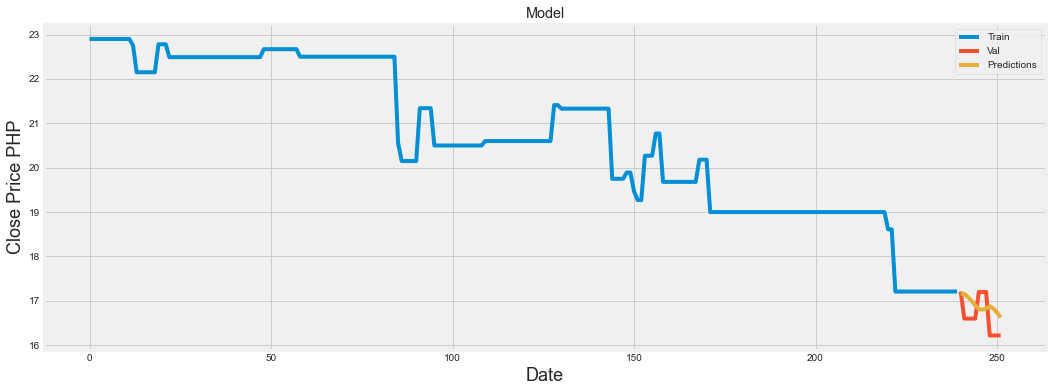

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price PHP', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [27]:
# Show the valid and predicted prices
valid

,Close,Predictions
240,17.209999,17.157711
241,16.600000,17.155876
242,16.600000,17.089140
243,16.600000,16.996887
244,16.600000,16.901382
245,17.200001,16.814436
246,17.200001,16.801954
247,17.200001,16.830746
248,16.219999,16.878454
249,16.219999,16.829369
